In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 30) # or 1000.
pd. set_option('display.max_rows', 30)

In [2]:
df=pd.read_csv('C:\\Users\\GENIUS\\OneDrive\\Desktop\\H2HBABBA3100.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [4]:
#splitting the data set to test data where we have null in clear_date and as it donot have target column.
Test_data=df[df['isOpen']==1].copy()

In [5]:
Train_data=df[df['isOpen']==0].copy()  #spliting our remaining data in new data frame Train_data for further cleaning and processing

In [6]:
Test_data.shape,Train_data.shape

((10000, 19), (40000, 19))

 Basic Preprocessing

In [7]:
#Analysis on col having null values.
Train_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [8]:
## As we got the series area_business null for the entire column.
#drop it as it will not help our model in any way to have more accuracy.
Train_data.drop('area_business', axis=1, inplace=True) 


In [9]:
#analysis on invoice_id as it have 6 null values.
Train_data[Train_data.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1528,CA02,0140106054,TREE corporation,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190207,20190217.0,CAD,X2,1.0,12964.32,20190207.0,CA10,NaN,0
13390,CA02,0100054351,UNF corp,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190314,20190324.0,CAD,X2,1.0,5964.00,20190314.0,CA10,NaN,0
28808,CA02,0140104429,COSTCO,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.20,20190311.0,CA10,NaN,0
37375,CA02,0140106054,TREE corporation,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190314,20190324.0,CAD,X2,1.0,216.80,20190314.0,CA10,NaN,0
43158,CA02,0140106054,TREE corporation,2019-06-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,25215.84,20190322.0,CA10,NaN,0
44419,CA02,0140104409,LOB co,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190220,20190302.0,CAD,X2,1.0,14172.84,20190220.0,CA10,NaN,0


In [10]:
#as our use case is finding clear date for an invoice genrated and as we know invoice_id is unique for every observation .
#dropping it wont infer our use case and as id_col cant be used as feature .
Train_data.drop('invoice_id', axis=1, inplace=True)


Constant and duplicate removal

In [11]:
#Removing Cols which have the same value in the entire dataset
unique_cols =  [x for x in Train_data.columns if Train_data[x].nunique()==1] 
print(unique_cols)
Train_data.drop(unique_cols,axis=1,inplace=True)
Train_data.columns

['posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [12]:
for col in Train_data.columns:
    if Train_data[col].nunique()<= 12:
        print(Train_data[col].value_counts())
        print('************')

U001    36134
CA02     3158
U013      575
U002      116
U005       14
U007        3
Name: business_code, dtype: int64
************
2019.0    34799
2020.0     5201
Name: buisness_year, dtype: int64
************
USD    36842
CAD     3158
Name: invoice_currency, dtype: int64
************
RV    39994
X2        6
Name: document type, dtype: int64
************


In [13]:
#as we can see in business code we have U005,U007 least occurence so group them so that model can get the info. form them
Train_data['business_code'] = np.where(Train_data['business_code'].isin(["U005","U007"]),"other_business",Train_data['business_code'])

Removing duplicated rows

In [14]:
#now we will check for the duplicate records  sum() will help to find number of duplicates 
df.duplicated().sum()

1152

In [15]:
#we will drop the duplicate record and keep='first' will keep the first occurence of the record.
Train_data.drop_duplicates(keep='first')

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U002,0200501669,WAL MA associates,2019-02-12 00:00:00,2019.0,1.990564e+09,2019-01-01,20181229,20190101,20190205.0,USD,RV,14454.87,20190101.0,NAG2
1,U001,0200803720,DEC foundation,2019-09-12 00:00:00,2019.0,1.929845e+09,2019-09-07,20190907,20190907,20190911.0,USD,RV,8168.94,20190901.0,NAM2
2,U001,0200331749,SYSC in,2019-04-15 00:00:00,2019.0,1.929044e+09,2019-03-29,20190328,20190329,20190413.0,USD,RV,5969.69,20190329.0,NAA8
3,U001,0200762301,C&S WH in,2019-05-09 00:00:00,2019.0,1.929196e+09,2019-04-25,20190423,20190425,20190510.0,USD,RV,68682.87,20190425.0,NAC6
4,U001,0200712187,SPAR systems,2019-07-23 00:00:00,2019.0,1.929594e+09,2019-07-08,20190709,20190708,20190723.0,USD,RV,61529.23,20190708.0,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200743123,KROGER systems,2019-08-19 00:00:00,2019.0,1.929690e+09,2019-08-02,20190801,20190802,20190817.0,USD,RV,123839.85,20190802.0,NAA8
49996,U001,0200772670,ASSOCIAT corporation,2019-09-03 00:00:00,2019.0,1.929748e+09,2019-08-16,20190814,20190816,20190831.0,USD,RV,93891.15,20190816.0,NAU5
49997,U001,0200769623,WAL-MAR co,2019-03-26 00:00:00,2019.0,1.928955e+09,2019-03-14,20190313,20190314,20190329.0,USD,RV,51387.27,20190314.0,NAH4
49998,U001,0200466603,SMITH'S associates,2019-12-16 00:00:00,2019.0,1.930207e+09,2019-12-01,20191130,20191201,20191216.0,USD,RV,58752.02,20191201.0,NAA8


In [16]:
Train_data['document type'].duplicated().sum() #we see a duplicate pattern in document type column


39998

In [17]:
#99 % of data have same value we can drop it as it wont harm our use case .
#also we could have used quasi constant as majority of element are same
Train_data.drop('document type',axis=1,inplace=True)


In [18]:
Train_data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
dtype: object

In [19]:
#correlation is more than 98 percent we can use one of the dates in feature engineering 
Train_data['document_create_date'].corr(Train_data['document_create_date.1'])

0.9864730709701789

# date time conversions


In [20]:
#to get the insight of the date column we need to change its dtype to datetime format 
#perform operations to extract major informations.
Train_data['due_in_date']= pd.to_datetime(Train_data['due_in_date'],format='%Y%m%d') 
Train_data['baseline_create_date']= pd.to_datetime(Train_data['baseline_create_date'],format='%Y%m%d')
Train_data['document_create_date']= pd.to_datetime(Train_data['document_create_date'],format='%Y%m%d') 
Train_data['document_create_date.1']= pd.to_datetime(Train_data['document_create_date.1'],format='%Y%m%d')
Train_data['clear_date']= pd.to_datetime(Train_data['clear_date'],format='%Y-%m-%d')  #from object to datetime format changes with '-' in it
Train_data['posting_date']= pd.to_datetime(Train_data['posting_date'],format='%Y-%m-%d')

In [21]:
#sorting our data as the clear date depends on i.e the date on which payment term started.
Train_data.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
15840,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,69443.10,2018-12-30,NAH4
44149,U001,0200744019,TARG in,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,23009.12,2018-12-30,NAA8
37074,U001,0200793568,SUPE foundation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,5036.54,2018-12-30,NAA8
10748,U001,0200762301,C&S WH co,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,18116.87,2018-12-30,NAC6
16465,U001,0200755701,ASSOCI llc,2019-01-15,2019.0,1.928537e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,18655.77,2018-12-30,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37828,U001,0200793513,KROGER corporation,2020-03-12,2020.0,1.930565e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,8469.35,2020-02-26,NAA8
24384,U001,0200769623,WAL-MAR us,2020-03-09,2020.0,1.930574e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,311.84,2020-02-26,NAH4
6082,U001,0100015557,BI foundation,2020-03-23,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,34492.97,2020-02-26,NAA8
21815,U001,0200413833,LDC systems,2020-03-20,2020.0,1.930559e+09,2020-02-27,2020-02-23,2020-02-27,2020-03-13,USD,29832.09,2020-02-27,NAA8


In [22]:
#We will create a target column here having difference of clear_date and due_in_date as a numeric dtype
Train_data['delay_no']=(Train_data['clear_date'] - Train_data['due_in_date']).dt.days

In [23]:
#grouping my cust_number and cust_payment_terms.
Train_data['avg_delay'] = Train_data.groupby(['cust_number','cust_payment_terms'])['delay_no'].transform(lambda x: x.mean())

In [24]:
Train_data['cust_number'].shape

(40000,)

# Dataset splitting 


In [25]:
# splitting in X and Y
#X contains the dataframe without the target column delay_no
X = Train_data.drop('delay_no',axis=1)

# y contains only the target column 
y = Train_data['delay_no']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_local_test,y_train,y_local_test = train_test_split(X,y,test_size=0.25,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_local_test,y_local_test,test_size=0.5,random_state=0 , shuffle = False)

In [27]:

X_train.shape , X_val.shape , X_test.shape

((30000, 15), (5000, 15), (5000, 15))

In [28]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,avg_delay
0,U002,0200501669,WAL MA associates,2019-02-12,2019.0,1.990564e+09,2019-01-01,2018-12-29,2019-01-01,2019-02-05,USD,14454.87,2019-01-01,NAG2,6.782609
1,U001,0200803720,DEC foundation,2019-09-12,2019.0,1.929845e+09,2019-09-07,2019-09-07,2019-09-07,2019-09-11,USD,8168.94,2019-09-01,NAM2,-0.712766
2,U001,0200331749,SYSC in,2019-04-15,2019.0,1.929044e+09,2019-03-29,2019-03-28,2019-03-29,2019-04-13,USD,5969.69,2019-03-29,NAA8,1.179775
3,U001,0200762301,C&S WH in,2019-05-09,2019.0,1.929196e+09,2019-04-25,2019-04-23,2019-04-25,2019-05-10,USD,68682.87,2019-04-25,NAC6,0.726148
4,U001,0200712187,SPAR systems,2019-07-23,2019.0,1.929594e+09,2019-07-08,2019-07-09,2019-07-08,2019-07-23,USD,61529.23,2019-07-08,NAA8,1.157895


In [29]:
X_train.dtypes


business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
avg_delay                        float64
dtype: object

# feature engineering

<AxesSubplot:xlabel='delay_no', ylabel='Density'>

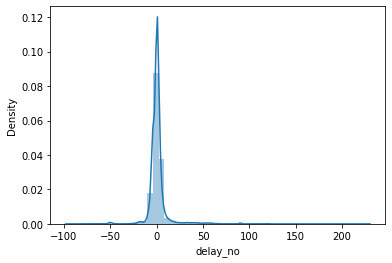

In [30]:
sns.distplot(y_train)

In [31]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,avg_delay,delay_no
0,0,U002,0200501669,WAL MA associates,2019-02-12,2019.0,1.990564e+09,2019-01-01,2018-12-29,2019-01-01,2019-02-05,USD,14454.87,2019-01-01,NAG2,6.782609,7
1,1,U001,0200803720,DEC foundation,2019-09-12,2019.0,1.929845e+09,2019-09-07,2019-09-07,2019-09-07,2019-09-11,USD,8168.94,2019-09-01,NAM2,-0.712766,1
2,2,U001,0200331749,SYSC in,2019-04-15,2019.0,1.929044e+09,2019-03-29,2019-03-28,2019-03-29,2019-04-13,USD,5969.69,2019-03-29,NAA8,1.179775,2
3,3,U001,0200762301,C&S WH in,2019-05-09,2019.0,1.929196e+09,2019-04-25,2019-04-23,2019-04-25,2019-05-10,USD,68682.87,2019-04-25,NAC6,0.726148,-1
4,4,U001,0200712187,SPAR systems,2019-07-23,2019.0,1.929594e+09,2019-07-08,2019-07-09,2019-07-08,2019-07-23,USD,61529.23,2019-07-08,NAA8,1.157895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,37503,U001,0200769623,WAL-MAR foundation,2019-04-25,2019.0,1.929093e+09,2019-04-07,2019-04-07,2019-04-07,2019-04-22,USD,645.54,2019-04-07,NAH4,-2.212673,3
29996,37505,U001,0200769623,WAL-MAR llc,2019-06-25,2019.0,1.929488e+09,2019-06-15,2019-06-13,2019-06-15,2019-06-30,USD,47824.46,2019-06-15,NAH4,-2.212673,-5
29997,37506,U001,0200705742,DOT systems,2019-10-23,2019.0,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-28,USD,53651.15,2019-10-08,NAD1,-4.000000,-5
29998,37507,U001,0200762301,C&S WH corporation,2019-08-23,2019.0,1.929719e+09,2019-08-08,2019-08-07,2019-08-08,2019-08-23,USD,18584.34,2019-08-08,NAC6,0.726148,0


<AxesSubplot:xlabel='delay_no', ylabel='total_open_amount'>

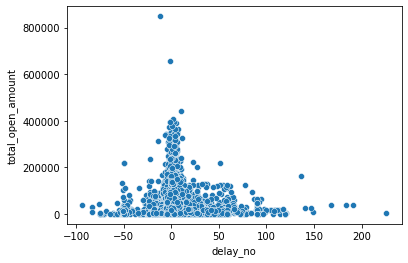

In [32]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_no", y="total_open_amount")

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30000 non-null  object        
 1   cust_number             30000 non-null  object        
 2   name_customer           30000 non-null  object        
 3   clear_date              30000 non-null  datetime64[ns]
 4   buisness_year           30000 non-null  float64       
 5   doc_id                  30000 non-null  float64       
 6   posting_date            30000 non-null  datetime64[ns]
 7   document_create_date    30000 non-null  datetime64[ns]
 8   document_create_date.1  30000 non-null  datetime64[ns]
 9   due_in_date             30000 non-null  datetime64[ns]
 10  invoice_currency        30000 non-null  object        
 11  total_open_amount       30000 non-null  float64       
 12  baseline_create_date    30000 non-null  dateti

In [34]:
X_train['range']=(X_train['due_in_date']-X_train['posting_date']).dt.days
X_train['range'].dtypes

dtype('int64')

<AxesSubplot:xlabel='range', ylabel='delay_no'>

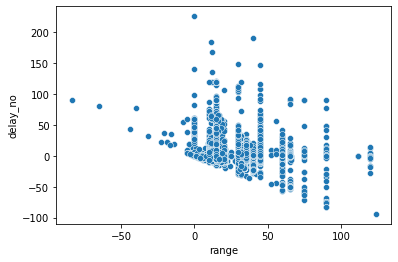

In [35]:
#checking range between two dates i.e(due date and posting date) effecting delay_no
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="range", y="delay_no")

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30000 non-null  object        
 1   cust_number             30000 non-null  object        
 2   name_customer           30000 non-null  object        
 3   clear_date              30000 non-null  datetime64[ns]
 4   buisness_year           30000 non-null  float64       
 5   doc_id                  30000 non-null  float64       
 6   posting_date            30000 non-null  datetime64[ns]
 7   document_create_date    30000 non-null  datetime64[ns]
 8   document_create_date.1  30000 non-null  datetime64[ns]
 9   due_in_date             30000 non-null  datetime64[ns]
 10  invoice_currency        30000 non-null  object        
 11  total_open_amount       30000 non-null  float64       
 12  baseline_create_date    30000 non-null  dateti

In [37]:
X_train['cust_number'].value_counts()>1

0200769623     True
0200726979     True
0200762301     True
0200759878     True
0200794332     True
              ...  
140103335     False
140105678     False
0200966944    False
140106209     False
140103699     False
Name: cust_number, Length: 1217, dtype: bool

In [38]:
#insight of grouping in customer ,avg delay and amount.
Train_data.groupby(['cust_number'])['delay_no'].mean()

cust_number
0100000048    22.500000
0100000158    34.000000
0100000161     0.000000
0100000217    -1.666667
0100000222    -3.892857
                ...    
CC7470        99.000000
CCCA02         7.950249
CCU001         6.750000
CCU002         7.384058
CCU013        42.652406
Name: delay_no, Length: 1332, dtype: float64

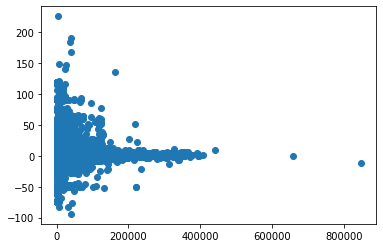

In [39]:
plt.scatter(X_train['total_open_amount'],y_train)

#  calculating no of outliers.

In [40]:
#checking for anomalies 
#checking due dates even before the invoice was genrated.
(X_train['baseline_create_date']>X_train['due_in_date']).sum()

0

In [41]:
#checking if open amount is in negative if yes then drop it.
(X_train['total_open_amount']<0).sum()

0

<AxesSubplot:xlabel='total_open_amount'>

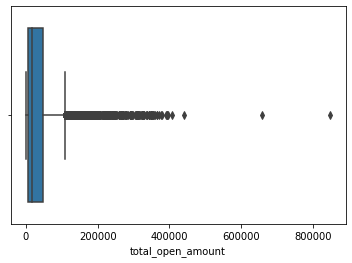

In [42]:
#checking univariate outliner
sns.boxplot(x=X_train['total_open_amount'])


In [43]:
Q1 = np.percentile(X_train['total_open_amount'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(X_train['total_open_amount'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1  

u = (Q3+1.5*IQR)
l = (Q1-1.5*IQR)

# identify outliers
outliers = [x for x in X_train['total_open_amount'] if x < l or x > u]
print('Identified outliers: %d' % len(outliers))
#removing outliers
outliers_removed = [x for x in X_train['total_open_amount'] if x > Q1 and x < u]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 1561
Non-outlier observations: 20939


# Feature engineering

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           30000 non-null  object        
 1   cust_number             30000 non-null  object        
 2   name_customer           30000 non-null  object        
 3   clear_date              30000 non-null  datetime64[ns]
 4   buisness_year           30000 non-null  float64       
 5   doc_id                  30000 non-null  float64       
 6   posting_date            30000 non-null  datetime64[ns]
 7   document_create_date    30000 non-null  datetime64[ns]
 8   document_create_date.1  30000 non-null  datetime64[ns]
 9   due_in_date             30000 non-null  datetime64[ns]
 10  invoice_currency        30000 non-null  object        
 11  total_open_amount       30000 non-null  float64       
 12  baseline_create_date    30000 non-null  dateti

In [45]:
#listing out categorical and numerical variables for feature engineering.
numCols = X_train.select_dtypes("number").columns
catCols = X_train.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
print(numCols)
print(catCols)

['range', 'total_open_amount', 'buisness_year', 'avg_delay', 'doc_id']
['name_customer', 'business_code', 'invoice_currency', 'cust_number', 'cust_payment_terms']


In [46]:
#finding unique values in every categorical col to specify the type of encoding.
X_train.nunique()

business_code                 5
cust_number                1217
name_customer              3455
clear_date                  392
buisness_year                 2
doc_id                    29526
posting_date                422
document_create_date        425
document_create_date.1      422
due_in_date                 489
invoice_currency              2
total_open_amount         27196
baseline_create_date        429
cust_payment_terms           66
avg_delay                   638
range                        65
dtype: int64

In [47]:
#label encoding business_code
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [48]:
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc '] = business_code_encoder.transform(X_test['business_code'])

In [49]:
# function to delete a column from train, val and test
def col_remover(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [50]:
X_train ,X_val, X_test = col_remover(['business_code'])

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             30000 non-null  object        
 1   name_customer           30000 non-null  object        
 2   clear_date              30000 non-null  datetime64[ns]
 3   buisness_year           30000 non-null  float64       
 4   doc_id                  30000 non-null  float64       
 5   posting_date            30000 non-null  datetime64[ns]
 6   document_create_date    30000 non-null  datetime64[ns]
 7   document_create_date.1  30000 non-null  datetime64[ns]
 8   due_in_date             30000 non-null  datetime64[ns]
 9   invoice_currency        30000 non-null  object        
 10  total_open_amount       30000 non-null  float64       
 11  baseline_create_date    30000 non-null  datetime64[ns]
 12  cust_payment_terms      30000 non-null  object

In [52]:
#label encoding business_code
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_enco'] = cust_number_encoder.transform(X_train['cust_number'])

In [53]:
# finding what are the new catagories in the validation set for cust_number
diff = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [54]:
X_val['cust_enco'] = cust_number_encoder.transform(X_val['cust_number'])

In [55]:
#same process for test set also
diff = set(X_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)
X_test['cust_enco'] = cust_number_encoder.transform(X_test['cust_number'])

In [56]:
#dropping cust_payment_terms form all the set.
X_train ,X_val, X_test = col_remover(['cust_number'])


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           30000 non-null  object        
 1   clear_date              30000 non-null  datetime64[ns]
 2   buisness_year           30000 non-null  float64       
 3   doc_id                  30000 non-null  float64       
 4   posting_date            30000 non-null  datetime64[ns]
 5   document_create_date    30000 non-null  datetime64[ns]
 6   document_create_date.1  30000 non-null  datetime64[ns]
 7   due_in_date             30000 non-null  datetime64[ns]
 8   invoice_currency        30000 non-null  object        
 9   total_open_amount       30000 non-null  float64       
 10  baseline_create_date    30000 non-null  datetime64[ns]
 11  cust_payment_terms      30000 non-null  object        
 12  avg_delay               30000 non-null  float6

In [58]:
#label encoding cust_payment_terms.
#as the agreement between two company can effect the delay.
from sklearn.preprocessing import LabelEncoder
cust_terms_encoder = LabelEncoder()
cust_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enco'] = cust_terms_encoder.transform(X_train['cust_payment_terms'])

In [59]:
# finding what are the new catagories in the validation set for cust_payment_terms
diff = set(X_val['cust_payment_terms'])-set(cust_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_terms_encoder.classes_ = np.append(cust_terms_encoder.classes_,items)

In [60]:
X_val['cust_payment_terms_enco'] = cust_terms_encoder.transform(X_val['cust_payment_terms'])

In [61]:
#similarly for test set
# finding what are the new catagories in the validation set for cust_payment_terms
diff = set(X_test['cust_payment_terms'])-set(cust_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_terms_encoder.classes_ = np.append(cust_terms_encoder.classes_,items)

In [62]:
X_test['cust_payment_terms_enco'] = cust_terms_encoder.transform(X_test['cust_payment_terms'])

In [63]:
#dropping cust_payment_terms form all the set.
X_train ,X_val, X_test = col_remover(['cust_payment_terms'])

In [64]:
#label encoding invoice_currency
from sklearn.preprocessing import LabelEncoder
invoice_curr_encoder = LabelEncoder()
invoice_curr_encoder.fit(X_train['invoice_currency'])
X_train['invoice_curr_enc'] = invoice_curr_encoder.transform(X_train['invoice_currency'])
X_val['invoice_curr_enc'] = invoice_curr_encoder.transform(X_val['invoice_currency'])
X_test['invoice_curr_enc'] = invoice_curr_encoder.transform(X_test['invoice_currency'])

#removing invoice_curr column
X_train ,X_val, X_test = col_remover(['invoice_currency'])

In [65]:
# wrote a custom function to do a status check  on all the dataframes 
def sets_status(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [66]:
sets_status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name_customer            30000 non-null  object        
 1   clear_date               30000 non-null  datetime64[ns]
 2   buisness_year            30000 non-null  float64       
 3   doc_id                   30000 non-null  float64       
 4   posting_date             30000 non-null  datetime64[ns]
 5   document_create_date     30000 non-null  datetime64[ns]
 6   document_create_date.1   30000 non-null  datetime64[ns]
 7   due_in_date              30000 non-null  datetime64[ns]
 8   total_open_amount        30000 non-null  float64       
 9   baseline_create_date     30000 non-null  datetime64[ns]
 10  avg_delay                30000 non-null  float64       
 11  range                    30000 non-null  int64         
 12  business_code_enc        30000 n

In [67]:
#Extracting features form date columns.
#extract day,month and year 
#for _baseline_create_date ----->>> date on which invoice was genrated.

X_train['day_of_invoice_crea'] = X_train['baseline_create_date'].dt.day
X_train['month_of_invoice_crea'] = X_train['baseline_create_date'].dt.month


X_val['day_of_invoice_crea'] = X_val['baseline_create_date'].dt.day
X_val['month_of_invoice_crea'] = X_val['baseline_create_date'].dt.month



X_test['day_of_invoice_crea'] = X_test['baseline_create_date'].dt.day
X_test['month_of_invoice_crea'] = X_test['baseline_create_date'].dt.month


In [68]:
#for clear_date ----->>> date on which payment was cleared by company.

X_train['day_of_clear_date'] = X_train['clear_date'].dt.day
X_train['month_of_clear_date'] = X_train['clear_date'].dt.month


X_val['day_of_clear_date'] = X_val['clear_date'].dt.day
X_val['month_of_clear_date'] = X_val['clear_date'].dt.month



X_test['day_of_clear_date'] = X_test['clear_date'].dt.day
X_test['month_of_clear_date'] = X_test['clear_date'].dt.month

In [69]:
#for due_in_date ----->>>  payment duedate 
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month


X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month



X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month

In [70]:
#for posting_date ----->>>  date on which payment term started. 
X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month


X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month



X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month

In [71]:
#for document_create_date ----->>>  date on which invoice document was created.
# we will use document_create_date.1 as we seen before converting them to datetime
#there was 98% corelation between this date and document_create_date 
X_train['day_of_doc_create_date'] = X_train['document_create_date.1'].dt.day
X_train['month_of_doc_create_date'] = X_train['document_create_date.1'].dt.month


X_val['day_of_doc_create_date'] = X_val['document_create_date.1'].dt.day
X_val['month_of_doc_create_date'] = X_val['document_create_date.1'].dt.month



X_test['day_of_doc_create_date'] = X_test['document_create_date.1'].dt.day
X_test['month_of_doc_create_date'] = X_test['document_create_date.1'].dt.month

In [72]:
# droping date time columns after feature extracting from them
X_train ,X_val, X_test =col_remover(['baseline_create_date'])
X_train ,X_val, X_test =col_remover(['clear_date'])
X_train ,X_val, X_test =col_remover(['due_in_date'])
X_train ,X_val, X_test =col_remover(['posting_date'])
X_train ,X_val, X_test =col_remover(['document_create_date.1'])

In [73]:
sets_status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name_customer             30000 non-null  object        
 1   buisness_year             30000 non-null  float64       
 2   doc_id                    30000 non-null  float64       
 3   document_create_date      30000 non-null  datetime64[ns]
 4   total_open_amount         30000 non-null  float64       
 5   avg_delay                 30000 non-null  float64       
 6   range                     30000 non-null  int64         
 7   business_code_enc         30000 non-null  int32         
 8   cust_enco                 30000 non-null  int32         
 9   cust_payment_terms_enco   30000 non-null  int32         
 10  invoice_curr_enc          30000 non-null  int32         
 11  day_of_invoice_crea       30000 non-null  int64         
 12  month_of_invoice_c

<AxesSubplot:>

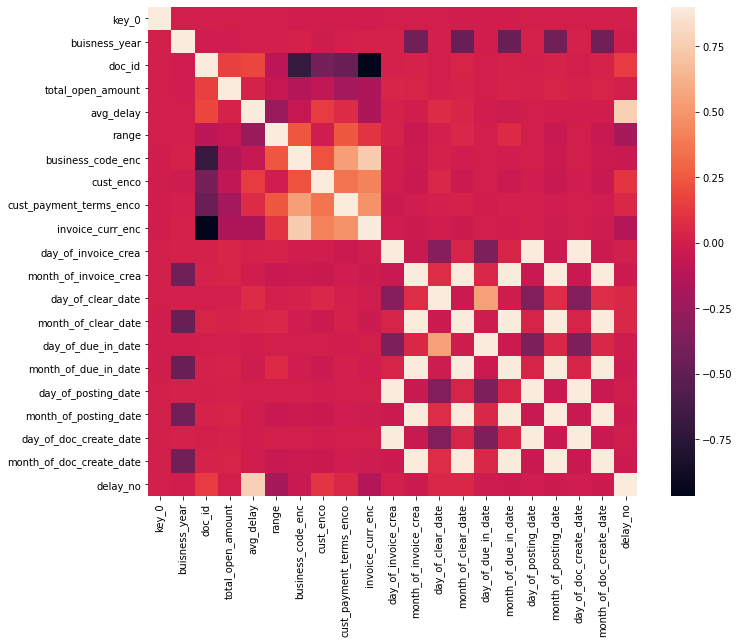

In [74]:
#Feature Selection

corrmat = X_train.merge(y_train , on = X_train.index).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

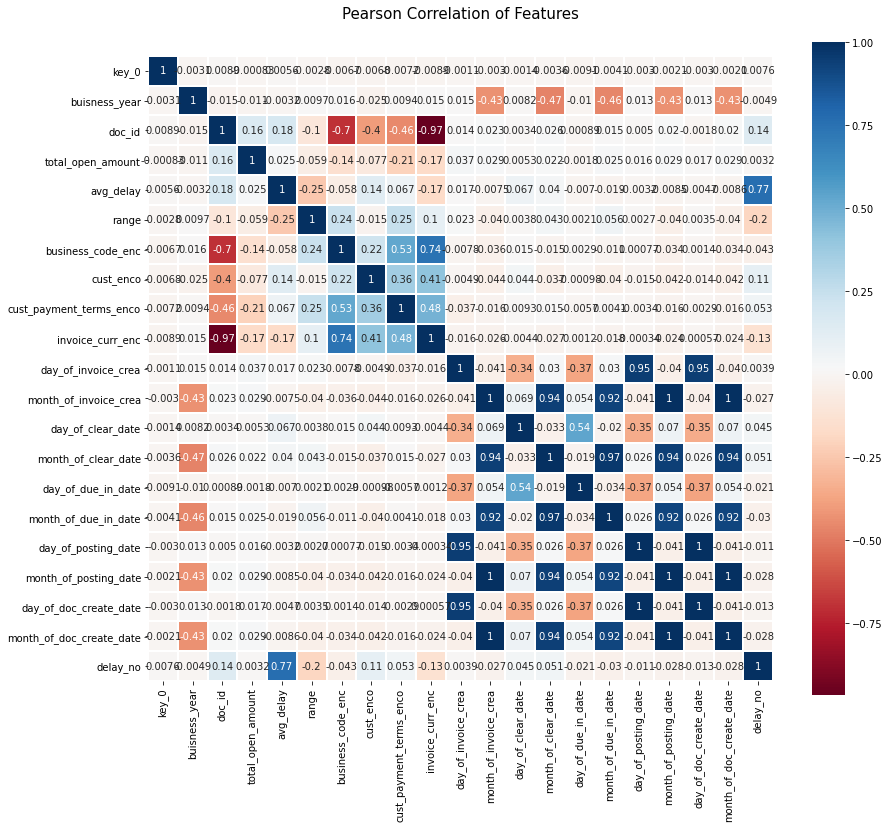

In [75]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [76]:
#we can drop doc_id as it is unique for each row and cust_name 
#and use  cust_number_enc as our identifier.
X_train ,X_val, X_test =col_remover(['name_customer'])
X_train ,X_val, X_test =col_remover(['doc_id'])
X_train ,X_val, X_test =col_remover(['buisness_year'])


In [77]:
X_train.drop('range',axis=1,inplace=True)

In [81]:
sets_status()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 37508
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_open_amount         30000 non-null  float64
 1   avg_delay                 30000 non-null  float64
 2   business_code_enc         30000 non-null  int32  
 3   cust_enco                 30000 non-null  int32  
 4   cust_payment_terms_enco   30000 non-null  int32  
 5   invoice_curr_enc          30000 non-null  int32  
 6   day_of_invoice_crea       30000 non-null  int64  
 7   month_of_invoice_crea     30000 non-null  int64  
 8   day_of_clear_date         30000 non-null  int64  
 9   month_of_clear_date       30000 non-null  int64  
 10  day_of_due_in_date        30000 non-null  int64  
 11  month_of_due_in_date      30000 non-null  int64  
 12  day_of_posting_date       30000 non-null  int64  
 13  month_of_posting_date     30000 non-null  int64  
 14  day_of

# Base Modelling
# Regression Model


In [82]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_predict = base_model.predict(X_val)

In [84]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.042699038272092

# Tree Model

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [86]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [87]:
y_predict2 = regressor.predict(X_val)

In [88]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict2, squared=False)

6.391181202459633

# Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
randomforestmodel = RandomForestRegressor()
randomforestmodel.fit(X_train, y_train)

# Predicting the Test Set Results
y_predict3 = randomforestmodel.predict(X_val)

In [90]:
#Scores of Random forest
mean_squared_error(y_val, y_predict3)
r2_score(y_val, y_predict3)
print(mean_squared_error(y_val, y_predict3),r2_score(y_val, y_predict3))

26.91903622 0.7437908303821155


# using Linear Regression model to test on our local test.

In [91]:
y_predict_test = base_model.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

6.572794254074159

Test_data

In [92]:
Test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930716e+09,2020-03-30,20200328,20200330,20200414.0,USD,RV,1.0,NaN,12898.09,20200330.0,NAH4,1.930716e+09,1
6,CA02,0140106408,WAL-M,NaN,2020.0,2.960627e+09,2020-04-07,20200407,20200407,20200417.0,CAD,RV,1.0,NaN,2799.23,20200407.0,CA10,2.960627e+09,1
10,U001,0200743996,STATER associates,NaN,2020.0,1.930752e+09,2020-04-07,20200405,20200407,20200422.0,USD,RV,1.0,NaN,56972.23,20200407.0,NAA8,1.930752e+09,1
15,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930829e+09,2020-04-27,20200426,20200427,20200512.0,USD,RV,1.0,NaN,8105.17,20200427.0,NAH4,1.930829e+09,1
16,U001,0200707822,PUBLI in,NaN,2020.0,1.930769e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,NaN,34696.11,20200409.0,NAA8,1.930769e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,U001,0200790107,ROU in,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,NaN,42958.34,20200317.0,NAC6,1.930660e+09,1
49957,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930593e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,NaN,26545.42,20200303.0,NAH4,1.930593e+09,1
49958,U001,0200435191,C& co,NaN,2020.0,1.930705e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,2050.47,20200327.0,NAC6,1.930705e+09,1
49971,U001,0200697207,WA llc,NaN,2020.0,1.930872e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,41159.01,20200507.0,NAA8,1.930872e+09,1


In [93]:
#preprocessing on test_data
Test_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [94]:
#dropping null columns other than clear date
Test_data.drop('area_business',axis=1,inplace=True)

In [95]:
X_main_test = Test_data.drop(['clear_date'],axis=1)
X_main_test

X_main_test.shape

(10000, 17)

In [96]:
#As we have to predict clear_date so drop it from Test_data also
Test_data.drop(['clear_date'], inplace =True,axis=1)

In [97]:
X_main_test.drop(unique_cols,axis=1,inplace=True)
X_main_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id'],
      dtype='object')

In [98]:
X_main_test.drop_duplicates(keep='first')

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
5,U001,0200769623,WAL-MAR us,2020.0,1.930716e+09,2020-03-30,20200328,20200330,20200414.0,USD,RV,12898.09,20200330.0,NAH4,1.930716e+09
6,CA02,0140106408,WAL-M,2020.0,2.960627e+09,2020-04-07,20200407,20200407,20200417.0,CAD,RV,2799.23,20200407.0,CA10,2.960627e+09
10,U001,0200743996,STATER associates,2020.0,1.930752e+09,2020-04-07,20200405,20200407,20200422.0,USD,RV,56972.23,20200407.0,NAA8,1.930752e+09
15,U001,0200769623,WAL-MAR corporation,2020.0,1.930829e+09,2020-04-27,20200426,20200427,20200512.0,USD,RV,8105.17,20200427.0,NAH4,1.930829e+09
16,U001,0200707822,PUBLI in,2020.0,1.930769e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,34696.11,20200409.0,NAA8,1.930769e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,U001,0200790107,ROU in,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,42958.34,20200317.0,NAC6,1.930660e+09
49957,U001,0200769623,WAL-MAR co,2020.0,1.930593e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,26545.42,20200303.0,NAH4,1.930593e+09
49958,U001,0200435191,C& co,2020.0,1.930705e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,2050.47,20200327.0,NAC6,1.930705e+09
49971,U001,0200697207,WA llc,2020.0,1.930872e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,41159.01,20200507.0,NAA8,1.930872e+09


In [100]:
diff = set(X_main_test['business_code'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    business_code_encoder.classes_ = np.append(business_code_encoder.classes_,items)
X_main_test['business_code_enc'] = business_code_encoder.transform(X_main_test['business_code'])

In [101]:
diff = set(X_main_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)
X_main_test['cust_enco'] = cust_number_encoder.transform(X_main_test['cust_number'])

In [102]:
X_main_test['cust_enco'] = cust_number_encoder.transform(X_main_test['cust_number'])

In [103]:
#similarly for test set
# finding what are the new catagories in the validation set for cust_payment_terms
diff = set(X_main_test['cust_payment_terms'])-set(cust_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_terms_encoder.classes_ = np.append(cust_terms_encoder.classes_,items)

X_main_test['cust_payment_terms_enco'] = cust_terms_encoder.transform(X_main_test['cust_payment_terms'])

In [104]:
X_main_test['invoice_curr_enc'] = invoice_curr_encoder.transform(X_main_test['invoice_currency'])

In [105]:
X_main_test['due_in_date']= pd.to_datetime(X_main_test['due_in_date'],format='%Y%m%d') 
X_main_test['baseline_create_date']= pd.to_datetime(X_main_test['baseline_create_date'],format='%Y%m%d')
X_main_test['document_create_date']= pd.to_datetime(X_main_test['document_create_date'],format='%Y%m%d') 
X_main_test['document_create_date.1']= pd.to_datetime(X_main_test['document_create_date.1'],format='%Y%m%d')
 #from object to datetime format changes with '-' in it
X_main_test['posting_date']= pd.to_datetime(X_main_test['posting_date'],format='%Y-%m-%d')

In [106]:

X_main_test['day_of_invoice_crea'] = X_main_test['baseline_create_date'].dt.day
X_main_test['month_of_invoice_crea'] = X_main_test['baseline_create_date'].dt.month



X_main_test['day_of_due_in_date'] = X_main_test['due_in_date'].dt.day
X_main_test['month_of_due_in_date'] = X_main_test['due_in_date'].dt.month

X_main_test['day_of_posting_date'] = X_main_test['posting_date'].dt.day
X_main_test['month_of_posting_date'] = X_main_test['posting_date'].dt.month

X_main_test['day_of_doc_create_date'] = X_main_test['document_create_date.1'].dt.day
X_main_test['month_of_doc_create_date'] = X_main_test['document_create_date.1'].dt.month

In [107]:
X_main_test.drop(['business_code','cust_number','invoice_currency','cust_payment_terms','document_create_date.1','posting_date','due_in_date','document_create_date','baseline_create_date'],inplace =True ,axis=1)

In [108]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5 to 49975
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name_customer             10000 non-null  object 
 1   buisness_year             10000 non-null  float64
 2   doc_id                    10000 non-null  float64
 3   document type             10000 non-null  object 
 4   total_open_amount         10000 non-null  float64
 5   invoice_id                10000 non-null  float64
 6   business_code_enc         10000 non-null  int32  
 7   cust_enco                 10000 non-null  int32  
 8   cust_payment_terms_enco   10000 non-null  int32  
 9   invoice_curr_enc          10000 non-null  int32  
 10  day_of_invoice_crea       10000 non-null  int64  
 11  month_of_invoice_crea     10000 non-null  int64  
 12  day_of_due_in_date        10000 non-null  int64  
 13  month_of_due_in_date      10000 non-null  int64  
 14  day_of

In [109]:
X_main_test.drop('name_customer',axis=1,inplace=True)
X_main_test.drop('doc_id',axis=1,inplace=True)
X_train

In [110]:

X_main_test.drop('invoice_id',axis=1,inplace=True)

In [115]:

X_main_test.drop(['document type','buisness_year'],axis=1,inplace=True)

In [123]:
X_main_test.columns

Index(['total_open_amount', 'business_code_enc', 'cust_enco',
       'cust_payment_terms_enco', 'invoice_curr_enc', 'day_of_invoice_crea',
       'month_of_invoice_crea', 'day_of_due_in_date', 'month_of_due_in_date',
       'day_of_posting_date', 'month_of_posting_date',
       'day_of_doc_create_date', 'month_of_doc_create_date'],
      dtype='object')

In [125]:
X_train.columns

Index(['total_open_amount', 'business_code_enc', 'cust_enco',
       'cust_payment_terms_enco', 'invoice_curr_enc', 'day_of_invoice_crea',
       'month_of_invoice_crea', 'day_of_due_in_date', 'month_of_due_in_date',
       'day_of_posting_date', 'month_of_posting_date',
       'day_of_doc_create_date', 'month_of_doc_create_date'],
      dtype='object')